In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback

from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
path_First_sticker= '../First Dataset collected on 3 December 2020/Data_to_be_process/First_Sticker'
path_Second_sticker= '../First Dataset collected on 3 December 2020/Data_to_be_process/Second_Sticker'
path_Third_sticker= '../First Dataset collected on 3 December 2020/Data_to_be_process/Third_Sticker'
path_Fourth_sticker= '../First Dataset collected on 3 December 2020/Data_to_be_process/Fourth_Sticker'
path_Fifth_sticker= '../First Dataset collected on 3 December 2020/Data_to_be_process/Fifth_Sticker'


In [3]:
NUMBER_OF_FEATURES=3387

In [4]:
First_Sticker_BackgroundRFactivities = pd.read_csv(path_First_sticker+'/BackgroundRFactivities.csv')
First_Sticker_Connected = pd.read_csv(path_First_sticker+'/Connected.csv')
First_Sticker_Searching = pd.read_csv(path_First_sticker+'/Searching.csv')
First_Sticker_Searching_without_connected = pd.read_csv(path_First_sticker+'/Searching_without_connecting_to_app.csv')

In [5]:
# Renaming the Title of each coloum 

First_Sticker_BackgroundRFactivities=First_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Connected=First_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching=First_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching_without_connected=First_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(First_Sticker_BackgroundRFactivities))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Changing pandas to numpy

First_Sticker_BackgroundRFactivities_numpy = First_Sticker_BackgroundRFactivities.to_numpy()
First_Sticker_Connected_numpy = First_Sticker_Connected.to_numpy()
First_Sticker_Searching_numpy = First_Sticker_Searching.to_numpy()
First_Sticker_Searching_without_connected_numpy = First_Sticker_Searching_without_connected.to_numpy()

In [33]:
# Seperating I and Q # In Numpy format

I_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,1]

I_Data_First_Connected = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected = First_Sticker_Connected_numpy[0:,1]

I_Data_First_Searching = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching = First_Sticker_Searching_numpy[0:,1]

I_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,1]


In [34]:
# Sliding window

def sliding_window(Data, window_size, overlap, copy = False):
    sh = (Data.size - window_size + 1, window_size)
    st = Data.strides * 2
    view = np.lib.stride_tricks.as_strided(Data, strides = st, shape = sh)[0::overlap]
    if copy:
        return view.copy()
    else:
        return view


In [50]:
# Creating sliding window Dataset

# 50% Over lapping 
window = 3800
overlap = 1900

I_Background_50_overlap = sliding_window(I_Data_First_BackgroundRFactivities,window,overlap)
Q_Background_50_overlap = sliding_window(Q_Data_First_BackgroundRFactivities,window,overlap)

I_Connected_50_overlap = sliding_window(I_Data_First_Connected,window,overlap)
Q_Connected_50_overlap = sliding_window(Q_Data_First_Connected,window,overlap)

I_Searching_50_overlap = sliding_window(I_Data_First_Searching,window,overlap)
Q_Searching_50_overlap = sliding_window(Q_Data_First_Searching,window,overlap)

I_Searching_WIFI_established_50_overlap = sliding_window(I_Data_First_Searching_WIFI_established,window,overlap)
Q_Searching_WIFI_established_50_overlap = sliding_window(Q_Data_First_Searching_WIFI_established,window,overlap)


# Concatenating the I Q overlap into a new variable for scaling

Concatenate_IQ_First_BackgroundRFactivities_2Dim = np.concatenate((I_Background_50_overlap,Q_Background_50_overlap),axis=1)

Concatenate_IQ_First_Connected_2Dim = np.concatenate((I_Connected_50_overlap,Q_Connected_50_overlap),axis=1)

Concatenate_IQ_First_Searching_2Dim = np.concatenate((I_Searching_50_overlap,Q_Searching_50_overlap),axis=1)

Concatenate_IQ_First_Searching_WIFI_established_2Dim = np.concatenate((I_Searching_WIFI_established_50_overlap,
                                                                       Q_Searching_WIFI_established_50_overlap),axis=1)

In [51]:
print(("Background I" ) + str(I_Background_50_overlap.shape))
print(("Background Q" ) + str(Q_Background_50_overlap.shape))

print(("Connected I" ) + str(I_Connected_50_overlap.shape))
print(("Connected Q" ) + str(Q_Connected_50_overlap.shape))

print(("Searching I" ) + str(I_Searching_50_overlap.shape))
print(("Searching Q" ) + str(Q_Searching_50_overlap.shape))

print(("Searching_WIFI_Established I" ) + str(I_Searching_WIFI_established_50_overlap.shape))
print(("Searching_WIFI_Established Q" ) + str(Q_Searching_WIFI_established_50_overlap.shape))


Background I(1781, 3800)
Background Q(1781, 3800)
Connected I(1781, 3800)
Connected Q(1781, 3800)
Searching I(1781, 3800)
Searching Q(1781, 3800)
Searching_WIFI_Established I(1781, 3800)
Searching_WIFI_Established Q(1781, 3800)


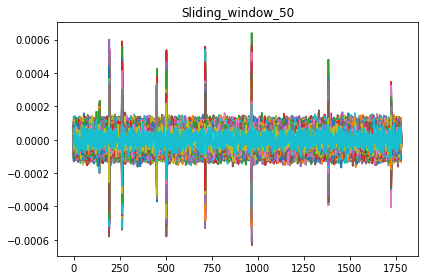

In [28]:
plt.plot(I_Background_50_overlap)
plt.title("Sliding_window_50")
plt.tight_layout()
plt.show()

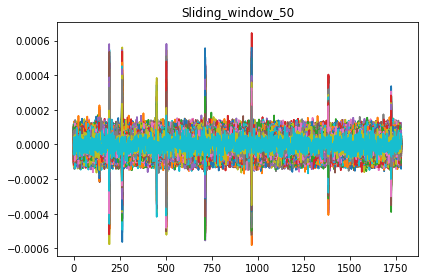

In [29]:
plt.plot(Q_Background_50_overlap)
plt.title("Sliding_window_50")
plt.tight_layout()
plt.show()

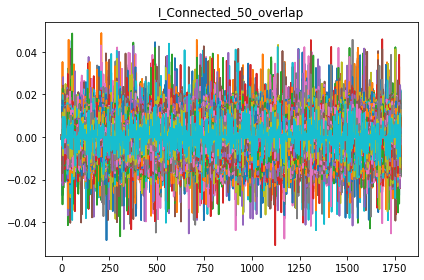

In [42]:
plt.plot(I_Connected_50_overlap)
plt.title("I_Connected_50_overlap")
plt.tight_layout()
plt.show()

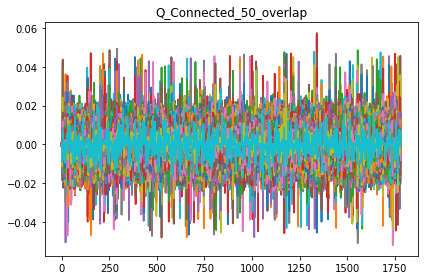

In [43]:
plt.plot(Q_Connected_50_overlap)
plt.title("Q_Connected_50_overlap")
plt.tight_layout()
plt.show()

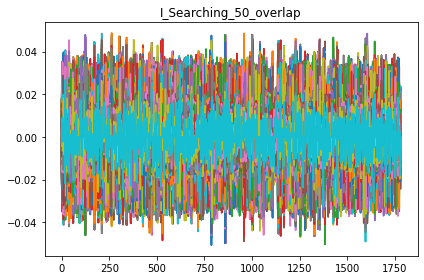

In [44]:
plt.plot(I_Searching_50_overlap)
plt.title("I_Searching_50_overlap")
plt.tight_layout()
plt.show()

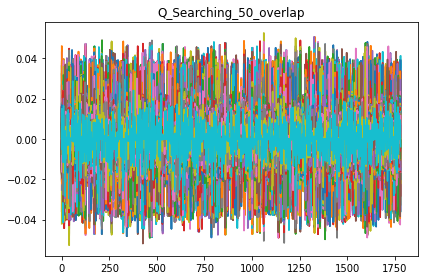

In [45]:
plt.plot(Q_Searching_50_overlap)
plt.title("Q_Searching_50_overlap")
plt.tight_layout()
plt.show()

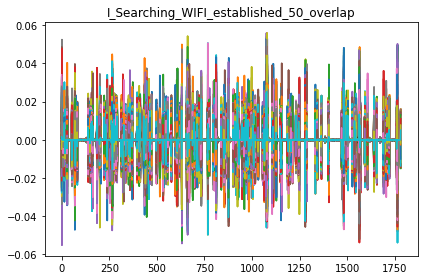

In [46]:
plt.plot(I_Searching_WIFI_established_50_overlap)
plt.title("I_Searching_WIFI_established_50_overlap")
plt.tight_layout()
plt.show()

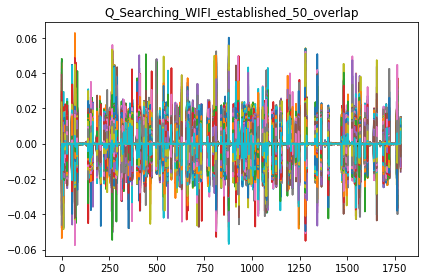

In [47]:
plt.plot(Q_Searching_WIFI_established_50_overlap)
plt.title("Q_Searching_WIFI_established_50_overlap")
plt.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import RobustScaler,StandardScaler

scaler_backgroundRFactivites = StandardScaler()
scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(Concatenate_IQ_First_BackgroundRFactivities_2Dim)
IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_BackgroundRFactivities_2Dim)

scaler_connected = StandardScaler()
scaler_connected_scaled = scaler_connected.fit(Concatenate_IQ_First_Connected_2Dim)
IQ_connected_numpy_scaled= scaler_connected_scaled.transform(Concatenate_IQ_First_Connected_2Dim)


scaler_searching = StandardScaler()
scaler_searching_scaled = scaler_searching.fit(Concatenate_IQ_First_Searching_2Dim)
IQ_searching_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_Searching_2Dim)

scaler_searching_WIFI_established = StandardScaler()
scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(Concatenate_IQ_First_Searching_WIFI_established_2Dim)
IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(Concatenate_IQ_First_Searching_WIFI_established_2Dim)

In [53]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [54]:
np.random.seed(2016)

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

Connected dataset shape : (1781, 7604)
Connected dataset shape : (1781, 7604)
Connected dataset shape : (1781, 7604)
Connected dataset shape : (1781, 7604)


[[ 0.6458206  -1.10023189 -0.40528863 ...  0.          0.
   0.        ]
 [-0.95911562 -0.62404913  0.78055775 ...  0.          0.
   0.        ]
 [ 0.65502925 -0.45608055 -0.94083215 ...  0.          0.
   0.        ]
 [ 1.05678951 -1.07386789 -0.22659578 ...  0.          0.
   0.        ]
 [ 1.61193958  0.75367372 -0.81992023 ...  0.          0.
   0.        ]]


[[-0.02549742 -0.02568218 -0.04558498 ...  1.          0.
   0.        ]
 [ 0.0228625   0.03359679  0.01752056 ...  1.          0.
   0.        ]
 [-0.03577279 -0.03364506 -0.03438916 ...  1.          0.
   0.        ]
 [ 0.03660033  0.04004523  0.00280845 ...  1.          0.
   0.        ]
 [-0.02225136 -0.01496184 -0.03906487 ...  1.          0.
   0.        ]]


[[-5.68405739e-01 -6.81941210e-01  1.03629182e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 

In [73]:
import copy

stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932
print(length_of_X_validation)


Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:7600]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,7600:]
print(Y_Train_Dataset)

6410
(4986, 7600)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [74]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:7600]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,7600:]
print(Validation_Dataset.shape)

(1424, 7600)


In [75]:
Train_Dataset=Train_Dataset.reshape(4986,7600,1)
Validation_Dataset=Validation_Dataset.reshape(1424,7600,1)
print(Validation_Dataset.shape)

(1424, 7600, 1)


In [77]:
Filterone = 100
Filtertwo = 160
KernalSize = 10
BATCH_SIZE = 100
epoch = 100
dropout = 0.2

model_m = Sequential()
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu', input_shape=(7600,1)))
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(GlobalMaxPooling1D())
model_m.add(Dropout(dropout))
model_m.add(Dense(4, activation='softmax'))

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_m.summary()


history=model_m.fit(Train_Dataset,Y_Train_Dataset, epochs=epoch, batch_size=BATCH_SIZE,shuffle=True, verbose=1, validation_data=(Validation_Dataset,Y_Validation_Dataset), callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

_, accuracy_validation = model_m.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))

_, accuracy_Train = model_m.evaluate(Train_Dataset, Y_Train_Dataset)
print('Accuracy_Training: %.2f' % (accuracy_Train*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 7591, 100)         1100      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 7582, 100)         100100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2527, 100)         0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 2518, 160)         160160    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 2509, 160)         256160    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 160)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 160)              

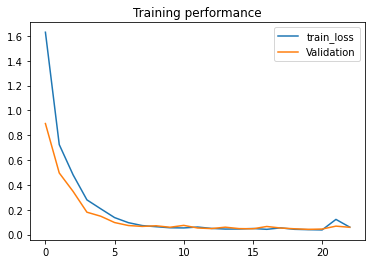

In [78]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()


In [79]:
model_m.save("{Slider_50_Model} First_Sticker_TRAINED")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {Slider_50_Model} First_Sticker_TRAINED/assets
